In [1]:
import pandas as pd
import numpy as np

def getGameLogFeatureSet(gameDF):

    def shiftGameLogRecords(gameDF):
        gameDF['LAST_GAME_OE'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['OFFENSIVE_EFFICIENCY'].shift(1)
        gameDF['LAST_GAME_HOME_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['HOME_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_AWAY_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['AWAY_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_TOTAL_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOTAL_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_ROLLING_SCORING_MARGIN'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_SCORING_MARGIN'].shift(1)
        gameDF['LAST_GAME_ROLLING_OE'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_OE'].shift(1)
    
    
    def getHomeTeamFrame(gameDF):
        homeTeamFrame = gameDF[gameDF['CITY'] != 'OPPONENTS']
        homeTeamFrame = homeTeamFrame[['LAST_GAME_OE','LAST_GAME_HOME_WIN_PCTG','NUM_REST_DAYS','LAST_GAME_AWAY_WIN_PCTG','LAST_GAME_TOTAL_WIN_PCTG','LAST_GAME_ROLLING_SCORING_MARGIN','LAST_GAME_ROLLING_OE','W','TEAM_ID','GAME_ID','SEASON']]

        colRenameDict = {}
        for col in homeTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON') :
                colRenameDict[col] = 'HOME_' + col 

        homeTeamFrame.rename(columns=colRenameDict,inplace=True)

        return homeTeamFrame

    def getAwayTeamFrame(gameDF):
        awayTeamFrame = gameDF[gameDF['CITY'] == 'OPPONENTS']
        awayTeamFrame = awayTeamFrame[['LAST_GAME_OE','LAST_GAME_HOME_WIN_PCTG','NUM_REST_DAYS','LAST_GAME_AWAY_WIN_PCTG','LAST_GAME_TOTAL_WIN_PCTG','LAST_GAME_ROLLING_SCORING_MARGIN','LAST_GAME_ROLLING_OE','TEAM_ID','GAME_ID','SEASON']]

        colRenameDict = {}
        for col in awayTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON'):
                colRenameDict[col] = 'AWAY_' + col 

        awayTeamFrame.rename(columns=colRenameDict,inplace=True)

        return awayTeamFrame
    
    shiftGameLogRecords(gameDF)
    awayTeamFrame = getAwayTeamFrame(gameDF)
    homeTeamFrame = getHomeTeamFrame(gameDF)
    
    return pd.merge(homeTeamFrame, awayTeamFrame, how="inner", on=[ "GAME_ID","SEASON"]).drop(['GAME_ID','AWAY_TEAM_ID','HOME_TEAM_ID'],axis=1)



In [2]:
import pandas as pd
import numpy as np

def getGameLogFeatureSet(gameDF):
    """
    Combina los datos de los partidos con las estadísticas de apuestas.

    Args:
        gameDF (pd.DataFrame): DataFrame con los datos de los partidos, incluyendo las columnas de apuestas.

    Returns:
        pd.DataFrame: DataFrame combinado con las estadísticas de los partidos y las apuestas.
    """

    def shiftGameLogRecords(gameDF):
        gameDF['LAST_GAME_OE'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['OFFENSIVE_EFFICIENCY'].shift(1)
        gameDF['LAST_GAME_HOME_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['HOME_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_AWAY_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['AWAY_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_TOTAL_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['TOTAL_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_ROLLING_SCORING_MARGIN'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['ROLLING_SCORING_MARGIN'].shift(1)
        gameDF['LAST_GAME_ROLLING_OE'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['ROLLING_OE'].shift(1)

    def getHomeTeamFrame(gameDF):
        homeTeamFrame = gameDF[gameDF['CITY'] != 'OPPONENTS']
        homeTeamFrame = homeTeamFrame[['LAST_GAME_OE', 'LAST_GAME_HOME_WIN_PCTG', 'NUM_REST_DAYS', 'LAST_GAME_AWAY_WIN_PCTG',
                                       'LAST_GAME_TOTAL_WIN_PCTG', 'LAST_GAME_ROLLING_SCORING_MARGIN', 'LAST_GAME_ROLLING_OE',
                                       'W', 'TEAM_ID', 'GAME_ID', 'SEASON', 'Average_H']]

        colRenameDict = {}
        for col in homeTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON'):
                colRenameDict[col] = 'HOME_' + col

        homeTeamFrame.rename(columns=colRenameDict, inplace=True)

        return homeTeamFrame

    def getAwayTeamFrame(gameDF):
        awayTeamFrame = gameDF[gameDF['CITY'] == 'OPPONENTS']
        awayTeamFrame = awayTeamFrame[['LAST_GAME_OE', 'LAST_GAME_HOME_WIN_PCTG', 'NUM_REST_DAYS', 'LAST_GAME_AWAY_WIN_PCTG',
                                       'LAST_GAME_TOTAL_WIN_PCTG', 'LAST_GAME_ROLLING_SCORING_MARGIN', 'LAST_GAME_ROLLING_OE',
                                       'TEAM_ID', 'GAME_ID', 'SEASON', 'Average_A']]

        colRenameDict = {}
        for col in awayTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON'):
                colRenameDict[col] = 'AWAY_' + col

        awayTeamFrame.rename(columns=colRenameDict, inplace=True)

        return awayTeamFrame

    # Aplicar el desplazamiento de registros
    shiftGameLogRecords(gameDF)

    # Obtener los DataFrames de equipos locales y visitantes
    awayTeamFrame = getAwayTeamFrame(gameDF)
    homeTeamFrame = getHomeTeamFrame(gameDF)

    # Combinar los datos de equipos locales y visitantes
    combinedDF = pd.merge(homeTeamFrame, awayTeamFrame, how="inner", on=["GAME_ID", "SEASON"])

    # Eliminar columnas innecesarias
    combinedDF = combinedDF.drop(['GAME_ID', 'AWAY_TEAM_ID', 'HOME_TEAM_ID'], axis=1, errors='ignore')

    return combinedDF

In [3]:
import sqlite3
import pandas as pd

# Conectar a la base de datos SQLite
conexion = sqlite3.connect("NBA_DATA.db")

# Leer todos los registros de la tabla GAMES
query = """
SELECT 
    gs.*,
    g.GAME_DATE,
    g.SEASON,
    ods.Average_H,
    ods.Average_A
FROM GAME_STATS gs
LEFT JOIN GAMES g ON gs.GAME_ID = g.GAME_ID
LEFT JOIN GAME_ODS ods ON gs.GAME_ID = ods.GAME_ID
"""
games_df = pd.read_sql_query(query, conexion)

# Cerrar la conexión
conexion.close()

# Mostrar los primeros registros del DataFrame
modelData = getGameLogFeatureSet(games_df)
modelData

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,HOME_Average_H,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE,AWAY_Average_A
0,0.561983,0.483871,2.0,0.454545,0.468750,0.666667,0.602820,1,2024-25,1.23,0.551181,0.363636,1.0,0.333333,0.349206,-9.333333,0.567970,4.40
1,0.661290,0.466667,2.0,0.454545,0.460317,0.666667,0.648050,1,2024-25,1.98,0.596639,0.655172,2.0,0.500000,0.573770,7.333333,0.615546,1.88
2,0.585185,0.448276,2.0,0.454545,0.451613,-6.666667,0.615792,1,2024-25,2.35,0.609375,0.655172,2.0,0.516129,0.583333,7.666667,0.637097,1.62
3,0.697674,0.464286,1.0,0.454545,0.459016,-12.000000,0.618470,0,2024-25,2.75,0.647059,0.700000,3.0,0.448276,0.576271,7.000000,0.556985,1.49
4,0.637795,0.733333,2.0,0.533333,0.633333,0.000000,0.616567,0,2024-25,1.34,0.564516,0.464286,3.0,0.437500,0.450000,-8.666667,0.574437,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10770,0.516129,0.750000,3.0,0.500000,0.625000,4.666667,0.537267,1,2024-25,1.25,0.500000,0.600000,3.0,0.500000,0.555556,-4.666667,0.544405,4.30
10771,0.586207,0.750000,2.0,0.500000,0.625000,-2.000000,0.555705,0,2024-25,2.95,0.504762,0.750000,2.0,0.333333,0.571429,2.000000,0.525717,1.44
10772,0.547009,0.666667,3.0,0.500000,0.571429,0.666667,0.567953,1,2024-25,2.85,0.590909,0.750000,3.0,0.500000,0.666667,15.000000,0.552585,1.47
10773,0.481481,0.666667,3.0,0.500000,0.600000,10.333333,0.563949,1,2024-25,1.18,0.533898,0.666667,3.0,0.666667,0.666667,0.333333,0.542849,5.20


In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing 
from sklearn.metrics import classification_report

Análisis de valores nulos:
                                       Cantidad Nulos  Porcentaje Nulos
AWAY_LAST_GAME_AWAY_WIN_PCTG                      483          4.482599
HOME_LAST_GAME_HOME_WIN_PCTG                      474          4.399072
HOME_LAST_GAME_AWAY_WIN_PCTG                      394          3.656613
AWAY_LAST_GAME_HOME_WIN_PCTG                      372          3.452436
AWAY_NUM_REST_DAYS                                362          3.359629
HOME_NUM_REST_DAYS                                338          3.136891
HOME_LAST_GAME_OE                                 159          1.475638
HOME_LAST_GAME_TOTAL_WIN_PCTG                     159          1.475638
HOME_LAST_GAME_ROLLING_SCORING_MARGIN             159          1.475638
HOME_LAST_GAME_ROLLING_OE                         159          1.475638
AWAY_LAST_GAME_TOTAL_WIN_PCTG                     157          1.457077
AWAY_LAST_GAME_ROLLING_OE                         157          1.457077
AWAY_LAST_GAME_ROLLING_SCORING_MARGIN

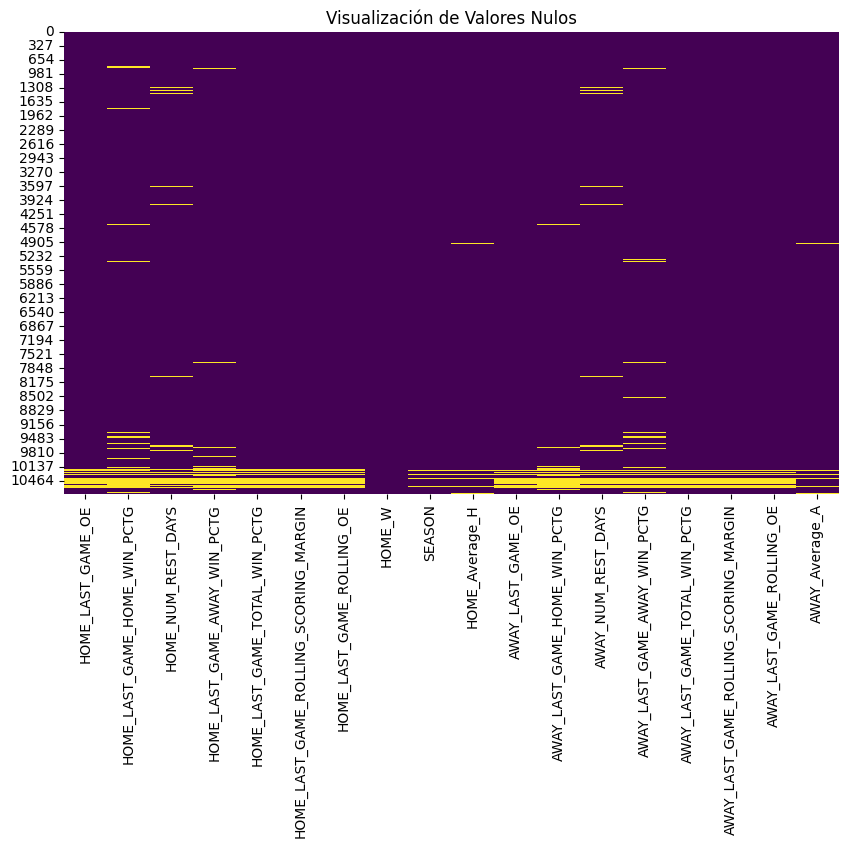

C:\Users\andre\AppData\Local\Temp\ipykernel_23752\1588104784.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values, palette='viridis')


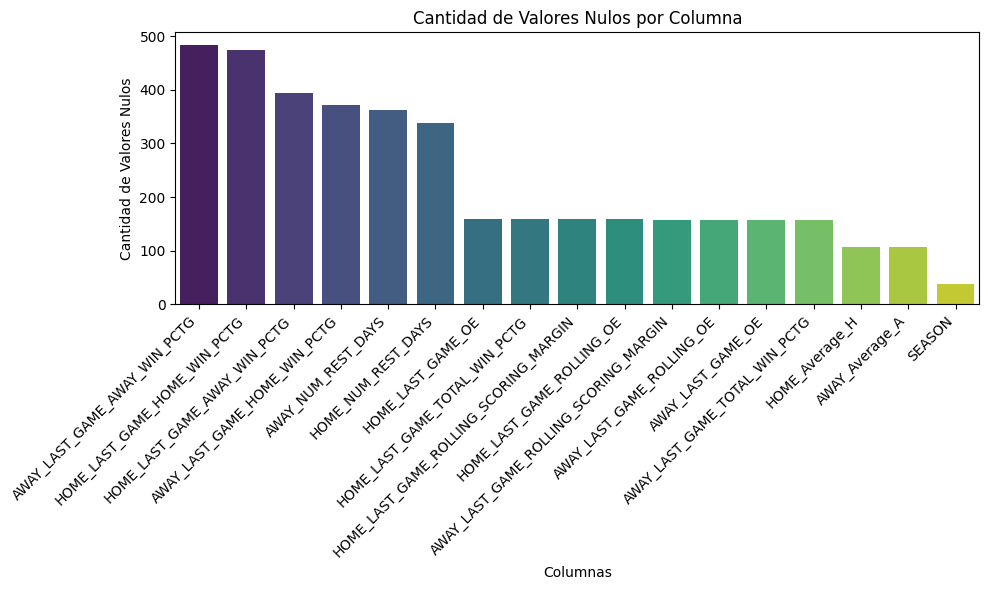

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_nulos(df):
    """
    Analiza los valores nulos en un DataFrame de pandas.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.

    Returns:
        pd.DataFrame: Un DataFrame con información sobre los valores nulos
                      por columna (cantidad, porcentaje).
    """
    total_nulos = df.isnull().sum()
    porcentaje_nulos = (total_nulos / len(df)) * 100
    info_nulos = pd.DataFrame({
        'Cantidad Nulos': total_nulos,
        'Porcentaje Nulos': porcentaje_nulos
    })
    return info_nulos.sort_values(by='Cantidad Nulos', ascending=False)

def mostrar_filas_con_nulos(df, columna=None, num_filas=5):
    """
    Muestra algunas filas que contienen valores nulos.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.
        columna (str, opcional): Si se especifica, muestra solo las filas con
                                 nulos en esa columna. Por defecto, muestra
                                 filas con nulos en cualquier columna.
        num_filas (int, opcional): El número máximo de filas a mostrar. Por
                                   defecto, muestra 5 filas.
    """
    if columna:
        filas_con_nulos = df[df[columna].isnull()]
        if not filas_con_nulos.empty:
            print(f"\nFilas con valores nulos en la columna '{columna}':")
            print(filas_con_nulos.head(num_filas))
        else:
            print(f"\nNo se encontraron valores nulos en la columna '{columna}'.")
    else:
        filas_con_nulos = df[df.isnull().any(axis=1)]
        if not filas_con_nulos.empty:
            print("\nAlgunas filas que contienen valores nulos:")
            print(filas_con_nulos.head(num_filas))
        else:
            print("\nNo se encontraron valores nulos en el DataFrame.")

def visualizar_nulos_matriz(df):
    """
    Visualiza la presencia de valores nulos como una matriz.

    Args:
        df (pd.DataFrame): El DataFrame a visualizar.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Visualización de Valores Nulos')
    plt.show()

def visualizar_nulos_barras(df):
    """
    Visualiza la cantidad de valores nulos por columna mediante un gráfico de barras.

    Args:
        df (pd.DataFrame): El DataFrame a visualizar.
    """
    

    nulos_por_columna = df.isnull().sum()
    nulos_por_columna = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)

    if not nulos_por_columna.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values, palette='viridis')
        plt.xlabel('Columnas')
        plt.ylabel('Cantidad de Valores Nulos')
        plt.title('Cantidad de Valores Nulos por Columna')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo se encontraron valores nulos para visualizar.")

# Ejemplo de uso:

# Crear un DataFrame de ejemplo con valores nulos
data = {'Columna A': [1, 2, None, 4, 5],
        'Columna B': [None, 'a', 'b', None, 'c'],
        'Columna C': [True, False, True, True, None],
        'Columna D': [3.14, 2.71, None, 1.61, 0.57]}
df_ejemplo = modelData

print("Análisis de valores nulos:")
info_nulos = analizar_nulos(df_ejemplo)
print(info_nulos)

mostrar_filas_con_nulos(df_ejemplo)
#mostrar_filas_con_nulos(df_ejemplo, columna='Columna B')

visualizar_nulos_matriz(df_ejemplo)
visualizar_nulos_barras(df_ejemplo)

In [6]:
data = modelData
data = data.dropna()
data

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,HOME_Average_H,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE,AWAY_Average_A
0,0.561983,0.483871,2.0,0.454545,0.468750,0.666667,0.602820,1,2024-25,1.23,0.551181,0.363636,1.0,0.333333,0.349206,-9.333333,0.567970,4.40
1,0.661290,0.466667,2.0,0.454545,0.460317,0.666667,0.648050,1,2024-25,1.98,0.596639,0.655172,2.0,0.500000,0.573770,7.333333,0.615546,1.88
2,0.585185,0.448276,2.0,0.454545,0.451613,-6.666667,0.615792,1,2024-25,2.35,0.609375,0.655172,2.0,0.516129,0.583333,7.666667,0.637097,1.62
3,0.697674,0.464286,1.0,0.454545,0.459016,-12.000000,0.618470,0,2024-25,2.75,0.647059,0.700000,3.0,0.448276,0.576271,7.000000,0.556985,1.49
4,0.637795,0.733333,2.0,0.533333,0.633333,0.000000,0.616567,0,2024-25,1.34,0.564516,0.464286,3.0,0.437500,0.450000,-8.666667,0.574437,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,0.481132,1.000000,2.0,0.500000,0.666667,13.000000,0.559826,1,2024-25,1.24,0.424242,0.500000,2.0,0.000000,0.333333,-13.000000,0.468165,4.40
10750,0.528926,1.000000,2.0,0.000000,0.500000,-17.000000,0.490127,0,2024-25,3.30,0.528926,1.000000,2.0,0.000000,0.500000,17.000000,0.599174,1.36
10753,0.525862,1.000000,2.0,1.000000,1.000000,12.000000,0.566461,1,2024-25,1.23,0.523810,0.000000,2.0,0.000000,0.000000,-12.000000,0.526693,4.40
10754,0.533333,0.000000,2.0,0.000000,0.000000,-14.500000,0.528135,0,2024-25,2.60,0.542373,1.000000,2.0,1.000000,1.000000,14.500000,0.586760,1.54


In [9]:
validation = data[data['SEASON'] == '2024-25']
modelData = data[data['SEASON'] != '2024-25']

In [10]:
X = modelData.drop(['HOME_W','SEASON'],axis=1)
y = modelData['HOME_W']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,shuffle=False)

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_data_train = scaler.transform(X_train)

scaler.fit(X_test)
scaled_data_test = scaler.transform(X_test)

In [11]:
#Logistic Regression

model = LogisticRegression()
model.fit(scaled_data_train,y_train)
model.score(scaled_data_test,y_test)

0.6693921080696765

In [12]:
F1Score = cross_val_score(model,scaled_data_test,y_test,cv=12,scoring='f1_macro')
print("Logistic Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))

Logistic Model F1 Accuracy: 0.64 (+/- 0.08)


In [13]:
# Test Set Review

y_pred = model.predict(scaled_data_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.51      0.57      1228
           1       0.68      0.79      0.73      1585

    accuracy                           0.67      2813
   macro avg       0.67      0.65      0.65      2813
weighted avg       0.67      0.67      0.66      2813



In [14]:
#Validation Set review

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(validation.drop(['HOME_W','SEASON'],axis=1))
scaled_val_data = scaler.transform(validation.drop(['HOME_W','SEASON'],axis=1))

In [16]:
y_pred = model.predict(scaled_val_data)
print(classification_report(validation['HOME_W'],y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.58       530
           1       0.66      0.80      0.72       631

    accuracy                           0.66      1161
   macro avg       0.67      0.65      0.65      1161
weighted avg       0.66      0.66      0.65      1161



In [17]:
def validator(predictions:pd.DataFrame, actual:pd.DataFrame, cuotas:pd.DataFrame):
    # predictions: DataFrame con las predicciones del modelo [GAME_ID, Prediction, Date]
    # actual: DataFrame con los resultados reales [GAME_ID, Result, Date]
    # cuotas: DataFrame con las cuotas [GAME_ID, Cuota_H, Cuota_A, Date]

    # Combinar los DataFrames en uno solo
    combined = predictions.merge(actual, on=["GAME_ID", "Date"]).merge(cuotas, on=["GAME_ID", "Date"])
    
    # Inicializar lista para almacenar resultados diarios
    daily_results = []

    # Iterar por cada día único en el DataFrame combinado
    for date, group in combined.groupby("Date"):
        # Inicializar métricas diarias
        total_money = 0
        total_bets = 0
        total_wins = 0
        total_odds = 0

        # Iterar por cada fila del grupo (día)
        for _, row in group.iterrows():
            total_bets += 1
            if row["Prediction"] == row["Result"]:  # Apuesta ganada
                total_wins += 1
                if row["Prediction"] == 1:  # Apostó por el equipo local
                    total_money += row["Cuota_H"]
                    total_odds += row["Cuota_H"]
                else:  # Apostó por el equipo visitante
                    total_money += row["Cuota_A"]
                    total_odds += row["Cuota_A"]
            else:  # Apuesta perdida
                total_money -= 1  # Supongamos que cada apuesta es de 1 unidad

        # Calcular cuota media
        avg_odds = total_odds / total_bets if total_bets > 0 else 0

        # Guardar resultados del día
        daily_results.append({
            "Date": date,
            "Total_Money": total_money,
            "Total_Bets": total_bets,
            "Total_Wins": total_wins,
            "Average_Odds": avg_odds
        })

    # Convertir resultados diarios a DataFrame
    results_df = pd.DataFrame(daily_results)

    return results_df

In [14]:
modelData.columns

Index(['HOME_LAST_GAME_OE', 'HOME_LAST_GAME_HOME_WIN_PCTG',
       'HOME_NUM_REST_DAYS', 'HOME_LAST_GAME_AWAY_WIN_PCTG',
       'HOME_LAST_GAME_TOTAL_WIN_PCTG',
       'HOME_LAST_GAME_ROLLING_SCORING_MARGIN', 'HOME_LAST_GAME_ROLLING_OE',
       'HOME_W', 'SEASON', 'HOME_Average_H', 'AWAY_LAST_GAME_OE',
       'AWAY_LAST_GAME_HOME_WIN_PCTG', 'AWAY_NUM_REST_DAYS',
       'AWAY_LAST_GAME_AWAY_WIN_PCTG', 'AWAY_LAST_GAME_TOTAL_WIN_PCTG',
       'AWAY_LAST_GAME_ROLLING_SCORING_MARGIN', 'AWAY_LAST_GAME_ROLLING_OE',
       'AWAY_Average_A'],
      dtype='object')

In [20]:
modelData_t = modelData[['HOME_W', 'HOME_Average_H']].dropna()
modelData_t.loc[modelData_t['HOME_W'] == 0, 'HOME_Average_H'] = -1
modelData_t.loc[modelData_t['HOME_Average_H'] != -1, 'HOME_Average_H'] -= 1
modelData_t

,HOME_W,HOME_Average_H
986,1,0.10
987,1,0.14
988,0,-1.00
989,0,-1.00
990,1,0.16
...,...,...
10652,1,0.77
10658,1,0.29
10662,1,1.30
10665,0,-1.00


In [21]:
modelData_t['HOME_Average_H'].sum()


-357.24999999999994

In [22]:
validation

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,HOME_Average_H,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE,AWAY_Average_A
0,0.561983,0.483871,2.0,0.454545,0.468750,0.666667,0.602820,1,2024-25,1.23,0.551181,0.363636,1.0,0.333333,0.349206,-9.333333,0.567970,4.40
1,0.661290,0.466667,2.0,0.454545,0.460317,0.666667,0.648050,1,2024-25,1.98,0.596639,0.655172,2.0,0.500000,0.573770,7.333333,0.615546,1.88
2,0.585185,0.448276,2.0,0.454545,0.451613,-6.666667,0.615792,1,2024-25,2.35,0.609375,0.655172,2.0,0.516129,0.583333,7.666667,0.637097,1.62
3,0.697674,0.464286,1.0,0.454545,0.459016,-12.000000,0.618470,0,2024-25,2.75,0.647059,0.700000,3.0,0.448276,0.576271,7.000000,0.556985,1.49
4,0.637795,0.733333,2.0,0.533333,0.633333,0.000000,0.616567,0,2024-25,1.34,0.564516,0.464286,3.0,0.437500,0.450000,-8.666667,0.574437,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,0.481132,1.000000,2.0,0.500000,0.666667,13.000000,0.559826,1,2024-25,1.24,0.424242,0.500000,2.0,0.000000,0.333333,-13.000000,0.468165,4.40
10750,0.528926,1.000000,2.0,0.000000,0.500000,-17.000000,0.490127,0,2024-25,3.30,0.528926,1.000000,2.0,0.000000,0.500000,17.000000,0.599174,1.36
10753,0.525862,1.000000,2.0,1.000000,1.000000,12.000000,0.566461,1,2024-25,1.23,0.523810,0.000000,2.0,0.000000,0.000000,-12.000000,0.526693,4.40
10754,0.533333,0.000000,2.0,0.000000,0.000000,-14.500000,0.528135,0,2024-25,2.60,0.542373,1.000000,2.0,1.000000,1.000000,14.500000,0.586760,1.54


In [25]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([396, 765], dtype=int64))